In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split 
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk import TweetTokenizer

In [25]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv("D://M_AI//Natural Language Processing//Datasets//TwitterHate.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
tweets = df['tweet'].to_list()

In [6]:
import re
from nltk.tokenize import TweetTokenizer

def basic_tweet_cleanup(tweets):
    #Lower casing
    tweets = [tweet.lower() for tweet in tweets]
    
    #Removing @
    tweets = [re.sub('@\S+\s+','',tweet) for tweet in tweets]
    
    #Removing URL 
    tweets = [re.sub('http\S://\S+','',tweet) for tweet in tweets]
    
    #Remove ‘#’ symbols from the tweet while retaining the term.
    tweets = [re.sub('#','',tweet) for tweet in tweets]
      
    #Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
    tweet_tokenizer = TweetTokenizer()
    tweets = [tweet_tokenizer.tokenize(tweet) for tweet in tweets]
    
    #Remove stop words
    tweets = [[token for token in tweet if token not in nltk.corpus.stopwords.words('english')] for tweet in tweets]
    
    #Remove redundant words like 'amp', 'rt'
    tweets = [[token for token in tweet if token not in ['amp','rt']] for tweet in tweets]
    
    return tweets

In [7]:
#View the cleaned tweets
tweets_cleaned = basic_tweet_cleanup(tweets)
print(tweets_cleaned[:5])

[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', '.', 'run'], ['thanks', 'lyft', 'credit', "can't", 'use', 'cause', 'offer', 'wheelchair', 'vans', 'pdx', '.', 'disapointed', 'getthanked'], ['bihday', 'majesty'], ['model', 'love', 'u', 'take', 'u', 'time', 'urð', '\x9f', '\x93', '±', '!', '!', '!', 'ð', '\x9f', '\x98', '\x99', 'ð', '\x9f', '\x98', '\x8e', 'ð', '\x9f', '\x91', '\x84', 'ð', '\x9f', '\x91', 'ð', '\x9f', '\x92', '¦', 'ð', '\x9f', '\x92', '¦', 'ð', '\x9f', '\x92', '¦'], ['factsguide', ':', 'society', 'motivation']]


In [8]:
#Defining an Advanced Cleanup function

def advanced_tweet_cleanup(tweets):
    #Filtering only alphabet words with length > 1
    tweets_cleaned = [[token for token in tweet_tokens if token.isalpha() and len(token) > 1] for tweet_tokens in tweets]
    return tweets_cleaned

In [9]:
tweets_cleaned = advanced_tweet_cleanup(tweets_cleaned)

In [10]:
#Joining the tokens in a list to find the top ten common terms
terms = []

for tweet in tweets_cleaned:
    for token in tweet:
        terms.append(token)

print("Total Tokens: {}".format(len(terms)))

Total Tokens: 236837


In [11]:
#Creating a table of top ten common words in the text data

from collections import Counter

counts_terms = Counter(terms)
terms_df = pd.DataFrame(counts_terms.most_common(10), columns=['term', 'count'])
terms_df

,term,count
0,love,2680
1,day,2271
2,happy,1683
3,time,1128
4,life,1103
5,like,1097
6,today,1008
7,new,988
8,positive,929
9,thankful,920


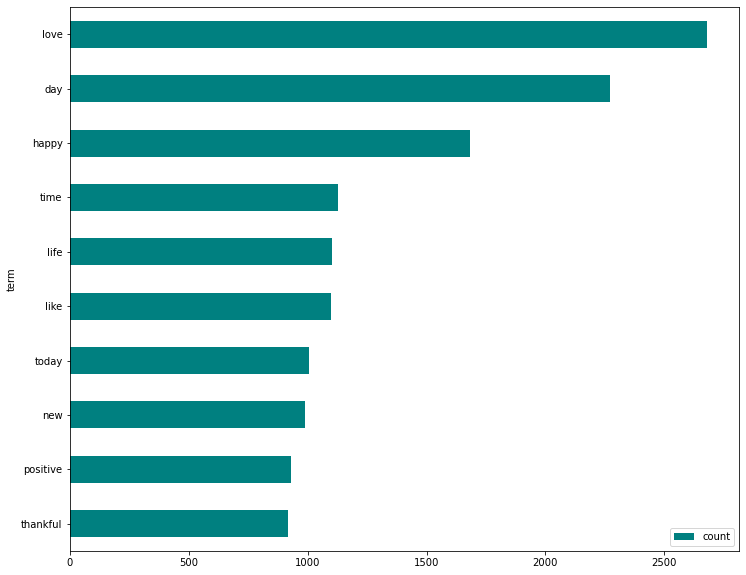

In [12]:
#Visualising the top ten common words
terms_df.sort_values(by='count', ascending=True).plot(kind="barh", x='term', figsize=(12,10), color='teal')
plt.show()

In [18]:
#Adding cleaned tweet data to the data frame for creating Bag of Words by TfidfVectorizer

tweets_cleaned_sent = []

for tweet in tweets_cleaned:
    sent = ""
    for token in tweet:
        sent = sent + token + " "
    tweets_cleaned_sent.append(sent[:-1])

tweets_cleaned_sent[:5]

['father dysfunctional selfish drags kids dysfunction run',
 'thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked',
 'bihday majesty',
 'model love take time urð',
 'factsguide society motivation']

In [19]:
#Assigning X and y for Classification
df['tweet_cleaned'] = tweets_cleaned_sent
X =  df['tweet_cleaned']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25569,)
(6393,)
(25569,)
(6393,)


In [22]:
vectorizer = TfidfVectorizer(max_features = 5000)

In [24]:
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.fit_transform(X_test)

print(X_train_bow.shape)
print(X_test_bow.shape)

(25569, 5000)
(6393, 5000)


In [26]:
#Logistic Regression Model
log_reg = LogisticRegression()
model = log_reg.fit(X_train_bow,y_train)
y_test_pred = model.predict(X_test_bow)

In [27]:
#test report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      5960
           1       0.75      0.03      0.07       433

    accuracy                           0.93      6393
   macro avg       0.84      0.52      0.52      6393
weighted avg       0.92      0.93      0.90      6393



In [28]:
#Train Report
y_train_pred = model.predict(X_train_bow)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     23760
           1       0.95      0.38      0.54      1809

    accuracy                           0.95     25569
   macro avg       0.95      0.69      0.76     25569
weighted avg       0.95      0.95      0.95     25569



In [29]:
#Creating a classifier model by Logistic Regression using class weight as 'balanced'
log_reg2 = LogisticRegression(class_weight = 'balanced')
model2 = log_reg2.fit(X_train_bow,y_train)

In [33]:
#New Test Report
y_test_pred2 = model.predict(X_test_bow)
print("New Test Report: \n", classification_report(y_test,y_test_pred2))

#New Train Report
y_train_pred2 = model.predict(X_train_bow)
print("New Train Report: \n",classification_report(y_train,y_train_pred2))

New Test Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      5960
           1       0.75      0.03      0.07       433

    accuracy                           0.93      6393
   macro avg       0.84      0.52      0.52      6393
weighted avg       0.92      0.93      0.90      6393

New Train Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     23760
           1       0.95      0.38      0.54      1809

    accuracy                           0.95     25569
   macro avg       0.95      0.69      0.76     25569
weighted avg       0.95      0.95      0.95     25569



In [34]:
#Regularization and Hypermeter Tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold
search_params= {
    "C": [0.01,0.1,1,10,100],
    "penalty": ["l1","l2"],
}

In [35]:
grid_search = GridSearchCV(estimator = log_reg2, param_grid = search_params, cv = StratifiedKFold(4), scoring = "recall", 
                           n_jobs = -1, verbose = 1)
grid_search.fit(X_train_bow, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [36]:
#Finding the best estimator
grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced')

In [37]:
#Validation of best estimator
y_test_pred3 = grid_search.best_estimator_.predict(X_test_bow)
print(classification_report(y_test, y_test_pred3))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5960
           1       0.12      0.19      0.15       433

    accuracy                           0.85      6393
   macro avg       0.53      0.54      0.53      6393
weighted avg       0.88      0.85      0.86      6393

